# **House Prices : Advanced Regression Techniques**

+ date : 2023.09.27.(수) <br>
+ author : 최호진 <br>
+ project : 개인 프로젝트<br>
+ github : https://github.com/Gansaw <br>
+ tistory : https://gansaw12.tistory.com <br>
+ email : gansaw12@gmail.com <br> <br>

---



# 1. 목표 #

  + House Prices 데이터를 활용하여 주택의 다양한 특징(위치, 크기, 시설 등)을 기반으로 분석한다.
  + 회귀(Regression) 분석을 이용하여 주택 가격을 예측한다.

a. 데이터 분석에 필요한 기본 library를 import한다.

    numpy
    matplotlib
    pandas
    seaborn
    sklearn

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

b. pandas를 이용하여 House Pricing 데이터셋을 불러온다.

    train : train.csv
    test : test.csv

In [2]:
train = pd.read_csv("/content/train.csv")
print(train)

test = pd.read_csv("/content/test.csv")
print(test)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

c. head 함수를 이용하여 데이터프레임의 상위 5개의 정보를 확인한다.

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


d. info 함수를 이용하여 기본적인 데이터 구성을 파악한다.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 2. 탐색적 데이터 분석(EDA)

  + 시각화를 통해 변수의 분포와 특성을 파악한다.
  + 데이터의 문제점이나 패턴을 찾는다.
  + 발견 시 전처리(preprocessing)나 특성 공학(Feature Engineering)을 진행한다.

a. 히트맵(heat map)를 이용하여 데이터를 파악한다.

  + SalePrice와 각 특징(Feature)과의 상관관계(corr)를 나타낸다.
  + 특징의 개수가 너무 많아 상관관계의 절대값(abs)이 0.4 이상인 값들만 표시하였다.

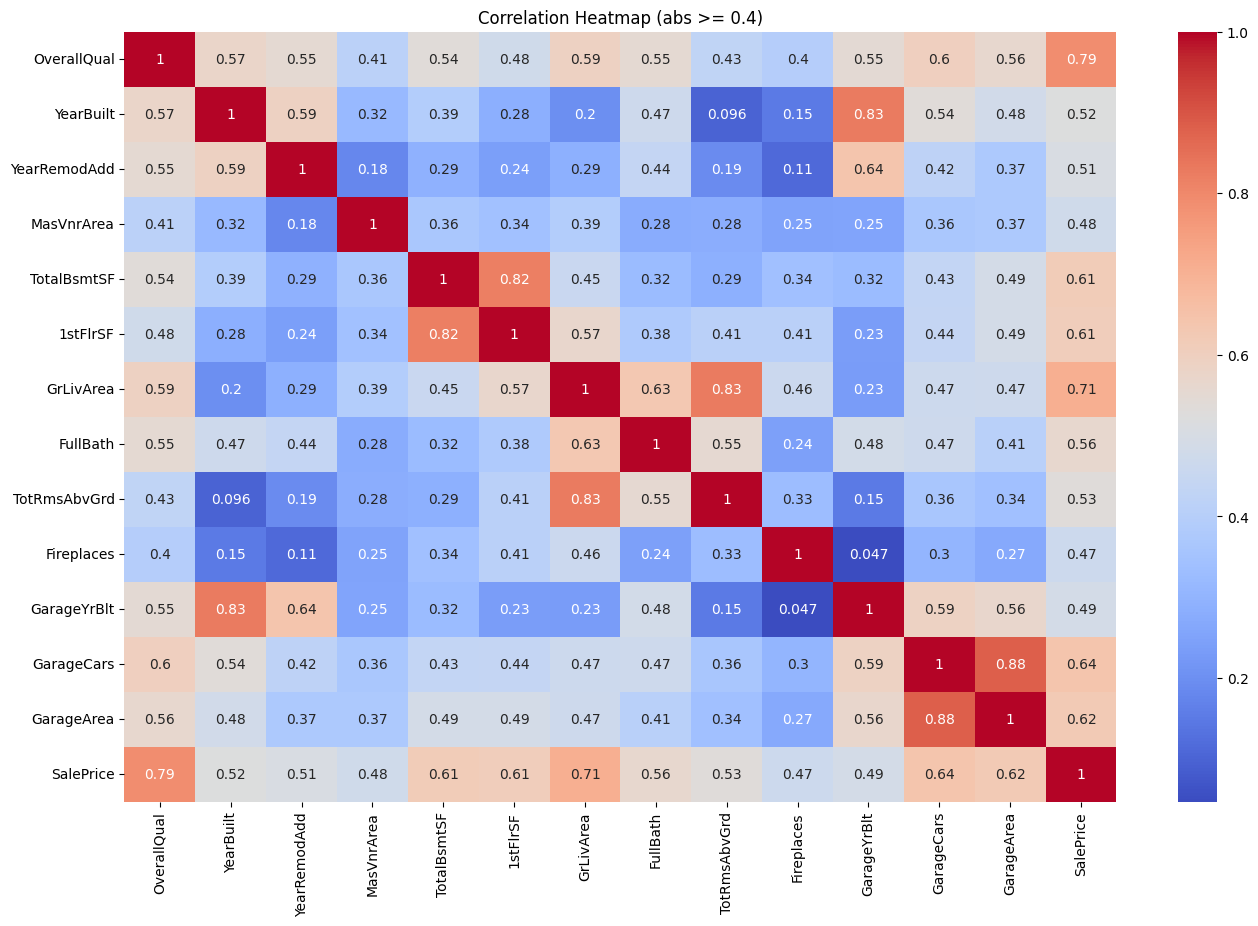

In [5]:
# SalePrice와 각 Feature과의 상관관계 표시
corr_matrix = train.corr(numeric_only=True)

# Feature가 너무 많아 다 담을 수 없어 상관관계의 절대값이 0.4 이상인 값들만 표시
high_corr_columns = corr_matrix["SalePrice"].abs() >= 0.4
corr_matrix_filtered = corr_matrix.loc[high_corr_columns, high_corr_columns]

plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(corr_matrix_filtered, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (abs >= 0.4)")
plt.show()

b. 산점도(scatter plot)를 이용하여 데이터를 파악한다.

  + OverallQual을 제외한 가장 상관관계가 높은 GrLivArea와 SalePrice를 비교한다.
  + GrLivArea에 따른 SalePrice를 나타낸다.

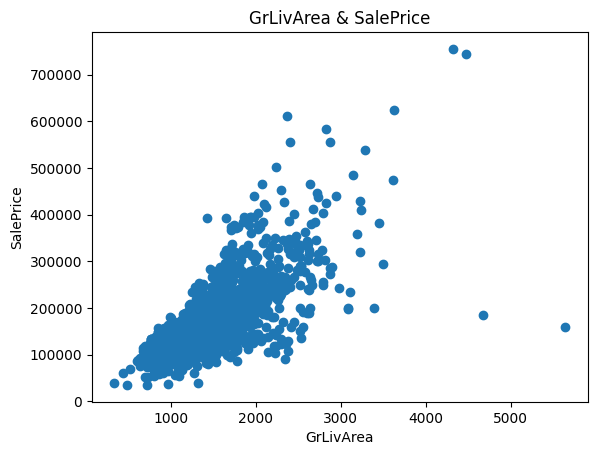

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = train["GrLivArea"], y = train["SalePrice"])
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.title("GrLivArea & SalePrice")
plt.show()

c. 커널밀도그래프(kde plot)를 이용하여 데이터를 파악한다.

  + target인 SalePrice의 데이터 분포를 시각화한다.
  + target의 왜도(skewness)를 파악하여 쏠림 정도를 확인할 수 있다.

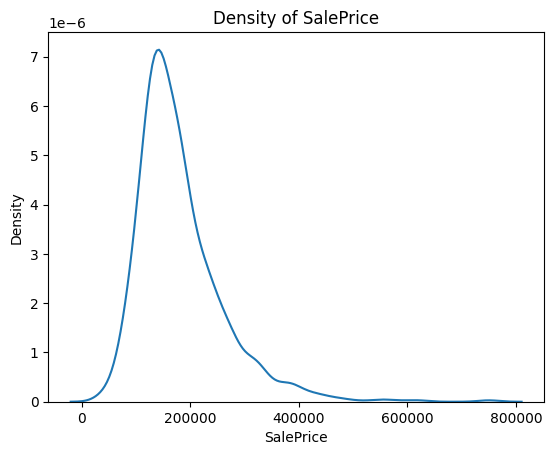

In [7]:
sns.kdeplot(train["SalePrice"])
plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.title("Density of SalePrice")
plt.show()

d. 탐색적 데이터 분석(EDA) 결론

  + train.info()를 통해 결측치(missing value)를 확인할 수 있었다.  
  + 히트맵을 통해 SalesPrice와 상관관계가 높은 특징들을 파악할 수 있었다.
  + 산점도를 통해 이상치(outlier)를 발견하였다.
  + 커널밀도그래프를 통해 SalePrice의 정규화가 필요하다는 것을 확인할 수 있었다.

# 3. 데이터 전처리(Data Preprocessing)

  + 범주를 지정하여 이상치를 처리한다.
  + train 데이터와 test데이터를 concat을 이용하여 병합한다.  
  + 병합된 데이터에 대해 일괄적으로 결측치를 처리한다.

a. 이상치(outlier)

  + 각각의 평균과 표준편차를 구하여 z-score 값을 계산한다.
  + 계산된 z-score 값을 이용하여 이상치의 범주를 설정한다.

In [8]:
# GrLivArea
mean_GrLivArea = train["GrLivArea"].mean()
std_GrLivArea = train["GrLivArea"].std()
threshold_GrLivArea = mean_GrLivArea + 3 * std_GrLivArea
train = train[train["GrLivArea"] < threshold_GrLivArea]

# GarageArea
mean_GarageArea = train["GarageArea"].mean()
std_GarageArea = train["GarageArea"].std()
threshold_GarageArea = mean_GarageArea + 3 * std_GarageArea
train = train[train["GarageArea"] < threshold_GarageArea]

# 1stFlrSF
mean_1stFlrSF = train["1stFlrSF"].mean()
std_1stFlrSF = train["1stFlrSF"].std()
threshold_1stFlrSF = mean_1stFlrSF + 3 * std_1stFlrSF
train = train[train["1stFlrSF"] < threshold_1stFlrSF]

# 2ndFlrSFa
mean_2ndFlrSF = train["2ndFlrSF"].mean()
std_2ndFlrSF = train["2ndFlrSF"].std()
threshold_2ndFlrSF = mean_2ndFlrSF + 3 * std_2ndFlrSF
train = train[train["2ndFlrSF"] < threshold_2ndFlrSF]

# TotalBsmtSF
mean_TotalBsmtSF = train["TotalBsmtSF"].mean()
std_TotalBsmtSF = train["TotalBsmtSF"].std()
threshold_TotalBsmtSF = mean_TotalBsmtSF + 3 * std_TotalBsmtSF
train = train[train["TotalBsmtSF"] < threshold_TotalBsmtSF]

# 이상치 제거 최종 점검
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1426 non-null   int64  
 1   MSSubClass     1426 non-null   int64  
 2   MSZoning       1426 non-null   object 
 3   LotFrontage    1174 non-null   float64
 4   LotArea        1426 non-null   int64  
 5   Street         1426 non-null   object 
 6   Alley          90 non-null     object 
 7   LotShape       1426 non-null   object 
 8   LandContour    1426 non-null   object 
 9   Utilities      1426 non-null   object 
 10  LotConfig      1426 non-null   object 
 11  LandSlope      1426 non-null   object 
 12  Neighborhood   1426 non-null   object 
 13  Condition1     1426 non-null   object 
 14  Condition2     1426 non-null   object 
 15  BldgType       1426 non-null   object 
 16  HouseStyle     1426 non-null   object 
 17  OverallQual    1426 non-null   int64  
 18  OverallC

b. 데이터 병합(concat)

  + 결측치 처리를 한번에 해주기 위해 train과 test를 병합한다.

In [9]:
df_train = train.drop('SalePrice', axis=1)
df = pd.concat((df_train,test))

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


c. 결측치(missing value) 처리

  + 병합된 데이터의 이상치 개수를 파악한다.
  + 수치형 데이터의 경우 0을 주고 범주형 데이터의 경우 NA로 대체한다.
  + NA의 개념이 없는 범주형 데이터의 경우에는 최빈값을 추가한다.(필수요소)

In [10]:
# 결측치 개수
mv_df = (df.isna().sum())
mv_df = mv_df.drop(mv_df[mv_df == 0].index).sort_values(ascending=False)

mv_df

PoolQC          2878
MiscFeature     2781
Alley           2688
Fence           2320
FireplaceQu     1417
LotFrontage      479
GarageFinish     158
GarageQual       158
GarageCond       158
GarageYrBlt      158
GarageType       156
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType1      79
BsmtFinType2      79
MasVnrType        23
MasVnrArea        22
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Utilities          2
GarageArea         1
GarageCars         1
Electrical         1
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
dtype: int64

In [11]:
# PoolQC : 수영장 품질, NA : 수영장 없음
df['PoolQC'] = df['PoolQC'].fillna('None')

# MiscFeature : 기타기능, NA : 기타기능 없음
df['MiscFeature'] = df['MiscFeature'].fillna('None')

# Alley : 골목 접근 유형, NA : 골목 접근 금지
df['Alley'] = df['Alley'].fillna('None')

# Fence : 울타리 여부, NA : 울타리 없음
df['Fence'] = df['Fence'].fillna('None')

# FireplaceQu : 벽난로 품질, NA : 벽난로 없음
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

# LotFrontage : 부동산과 연결된 거리의 직선 피트, 0 : 연결된 거리 없음
df['LotFrontage'] = df['LotFrontage'].fillna(0)

# GarageCond : 차고 상태, NA : 차고 없음
df['GarageCond'] = df['GarageCond'].fillna('None')

# GarageYrBlt : 차고 제작연도, 0 : 차고 없음
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

# GarageQual : 차고 품질, NA : 차고 없음
df['GarageQual'] = df['GarageQual'].fillna('None')

# GarageFinish : 차고 마감재 품질, NA : 차고 없음
df['GarageFinish'] = df['GarageFinish'].fillna('None')

# GarageType : 차고 유형, NA : 차고 없음
df['GarageType'] = df['GarageType'].fillna('None')

# 지하실 관련 카테고리형 데이터, NA : 지하실 없음
# BsmtExposure, BsmtCond, BsmtQual, BsmtFinType1, BsmtFinType2
for data in ['BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2']:
    df[data] = df[data].fillna('None')

# MasVnrType : 석조베니어 형태, NA : 석조베니어 없음
df['MasVnrType'] = df['MasVnrType'].fillna('None')

# MasVnrArea : 석조베니어 공간, 0 : 석조베니어 없음
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

# MSZoning : 홈 구조, 필수 요소이므로 최빈값인 RL로 변경
df['MSZoning'] = df['MSZoning'].fillna('RL')

# 지하실 관련 수치형 데이터, 0 : 지하실 없음
# BsmtFullBath, BsmtHalfBath, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF
for data in ['BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']:
    df[data] = df[data].fillna(0)

# Functional : 홈 기능, 필수요소이기 때문에 최빈값인 Typ로 변경
df["Functional"] = df["Functional"].fillna("Typ")

# Utilities : 공공시설(전기, 물, 수도, 등), 핅수요소이기 때문에 최빈값인 AllPub으로 변경
df['Utilities'] = df['Utilities'].fillna('AllPub')

# GarageCars, GarageArea : 차고의 차 개수와 차고넓이, 0 : 차고없음
for data in ['GarageCars', 'GarageArea']:
    df[data] = df[data].fillna(0)

# Exterior2nd :집 외부 덮개 (소재 2개 이상), NA : 소재 1개만 사용
df['Exterior2nd'] = df['Exterior2nd'].fillna('None')

# Exterior1nd :집 외부 덮개 (소재 1개), 1개는 필수로 있어야 하기 때문에 최빈값인 VinylSd로 변경
df['Exterior1st'] = df['Exterior1st'].fillna('VinylSd')

# KitchenQual : 주방 품질, 주방은 필수요소이기 때문에 최빈값인 TA로 변경
df['KitchenQual'] = df['KitchenQual'].fillna('TA')

# SaleType : 판매 유형, target이므로 필수 요소, 따라서 최빈값인 WD로 변경
df['SaleType'] = df['SaleType'].fillna('WD')

# Electrical : 전기시스템, 전기는 필수요소이기 때문에 최빈값인 SBrkr로 변경
df['Electrical'] = df['Electrical'].fillna('SBrkr')

# test 데이터 결측치 유무 최종점검
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2885 non-null   int64  
 1   MSSubClass     2885 non-null   int64  
 2   MSZoning       2885 non-null   object 
 3   LotFrontage    2885 non-null   float64
 4   LotArea        2885 non-null   int64  
 5   Street         2885 non-null   object 
 6   Alley          2885 non-null   object 
 7   LotShape       2885 non-null   object 
 8   LandContour    2885 non-null   object 
 9   Utilities      2885 non-null   object 
 10  LotConfig      2885 non-null   object 
 11  LandSlope      2885 non-null   object 
 12  Neighborhood   2885 non-null   object 
 13  Condition1     2885 non-null   object 
 14  Condition2     2885 non-null   object 
 15  BldgType       2885 non-null   object 
 16  HouseStyle     2885 non-null   object 
 17  OverallQual    2885 non-null   int64  
 18  OverallC

# 4. 특징 공학(Feature Engineering)

  + 데이터를 어떤 특징(feature)을 사용할 것인지 결정하는 작업
  + Scaling, Binning, One-Hot-Encoding, Transform, Dummy 등 다양한 방법이 있다.

a. SalePrice 정규화(scaling)

  + 정규화를 통해 데이터의 분포를 조정한다.
  + 로그(log) 변환을 이용하여 정규화를 진행한다.
  + 변환한 변수를 SalePrice_scaled 변수에 저장한다.

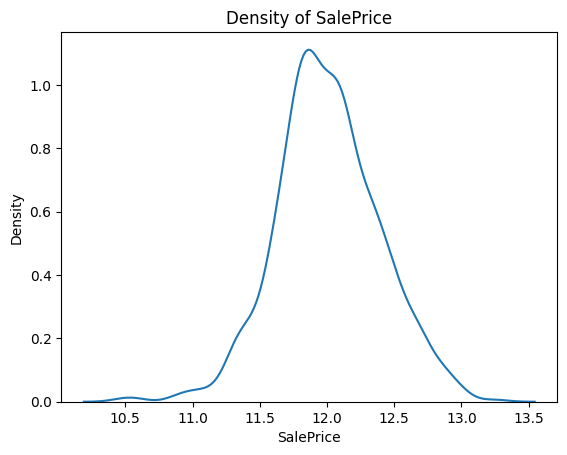

In [12]:
train["SalePrice"] = np.log1p(train["SalePrice"])
sns.kdeplot(train["SalePrice"])
plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.title("Density of SalePrice")
plt.show()

SalePrice_scaled = train["SalePrice"]

b. 데이터 형태 변환

  + 범주형 데이터를 수치형 데이터로 변환한다.
  + 적절하지 않은 형태의 데이터가 존재하는 경우 형 변환을 실시한다.

In [13]:
# 판매월과 판매연도가 수치형으로 되어있어 범주형으로 변환
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)

# 주거유형이 수치형으로 되어있어 범주형으로 변환
df['MSSubClass'] = df['MSSubClass'].astype(str)

# 수치형데이터와 범주형데이터 분리
obj_df = df.select_dtypes(include='object')
num_df = df.select_dtypes(exclude='object')

c. 라벨인코딩(LabelEncoding)

  + sklearn의 LabelEncoder을 이용하여 라벨인코딩을 진행한다.
  + 사용 시 데이터를 0부터 시작하는 정수형 숫자로 변환된다.

In [14]:
from sklearn.preprocessing import LabelEncoder

# 등급, 여부를 나타내는 column만 포함(모델이 잘못된 결과를 도출할 수 있기 때문에)
label_obj_list = ['Street', 'Alley','ExterQual', 'ExterCond','BsmtCond','HeatingQC', 'CentralAir',
       'KitchenQual', 'FireplaceQu','GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MoSold', 'YrSold','SaleCondition']

# 라벨인코딩 결과
for obj in label_obj_list:
    encoder = LabelEncoder()
    encoder.fit(list(df[obj].values))
    df[obj] = encoder.transform(list(df[obj].values))

df[obj]

0       4
1       4
2       4
3       0
4       4
       ..
1454    4
1455    0
1456    0
1457    4
1458    4
Name: SaleCondition, Length: 2885, dtype: int64

d. 왜도(skewness) 및 정규화(scaling)

  + scipy의 skew를 사용하여 각 데이터들의 왜도를 파악하여 비대칭도를 비교한다.
  + 왼쪽으로 많이 쏠린 경우 양의 값을, 오른쪽으로 많이 쏠린 경우 음의 값을 가진다.
  + 왜도값의 절대값이 큰 데이터들은 로그(log) 변환을 이용하여 정규화를 진행한다.

In [15]:
from scipy.stats import skew

# column별 왜도 값 표시
num_features = df.dtypes[df.dtypes != "object"].index
skewness = df[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

high_skewness = skewness[abs(skewness) > 1] # 왜도의 절대값이 1 이상인 column만 사용
skewness_result = high_skewness.index
print(high_skewness)
print()

# 로그 변환 후 정규화(train)
df[skewness_result] = np.log1p(df[skewness_result])
df[skewness_result]

MiscVal          21.828659
PoolArea         19.735182
LotArea          13.513860
LowQualFinSF     12.974636
3SsnPorch        11.308133
KitchenAbvGr      4.309957
BsmtFinSF2        4.185805
EnclosedPorch     3.994088
ScreenPorch       3.947207
BsmtHalfBath      3.933332
MasVnrArea        2.552618
OpenPorchSF       2.548728
WoodDeckSF        1.874177
1stFlrSF          1.201486
KitchenQual      -1.463700
ExterQual        -1.802584
Fence            -1.991976
ExterCond        -2.517356
SaleCondition    -2.819482
BsmtCond         -2.860422
PavedDrive       -2.964042
GarageQual       -3.058383
CentralAir       -3.433989
GarageCond       -3.577867
GarageYrBlt      -3.893754
Street          -16.102067
PoolQC          -25.048435
dtype: float64



,MiscVal,PoolArea,LotArea,LowQualFinSF,3SsnPorch,KitchenAbvGr,BsmtFinSF2,EnclosedPorch,ScreenPorch,BsmtHalfBath,...,ExterCond,SaleCondition,BsmtCond,PavedDrive,GarageQual,CentralAir,GarageCond,GarageYrBlt,Street,PoolQC
0,0.000000,0.0,9.042040,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,...,1.609438,1.609438,1.609438,1.098612,1.791759,0.693147,1.791759,7.602900,0.693147,1.386294
1,0.000000,0.0,9.169623,0.0,0.0,0.693147,0.0,0.000000,0.0,0.693147,...,1.609438,1.609438,1.609438,1.098612,1.791759,0.693147,1.791759,7.589336,0.693147,1.386294
2,0.000000,0.0,9.328212,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,...,1.609438,1.609438,1.609438,1.098612,1.791759,0.693147,1.791759,7.601902,0.693147,1.386294
3,0.000000,0.0,9.164401,0.0,0.0,0.693147,0.0,5.609472,0.0,0.000000,...,1.609438,0.000000,0.693147,1.098612,1.791759,0.693147,1.791759,7.600402,0.693147,1.386294
4,0.000000,0.0,9.565284,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,...,1.609438,1.609438,1.609438,1.098612,1.791759,0.693147,1.791759,7.601402,0.693147,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0.000000,0.0,7.568896,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,...,1.609438,1.609438,1.609438,1.098612,1.386294,0.693147,1.386294,0.000000,0.693147,1.386294
1455,0.000000,0.0,7.546974,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,...,1.609438,0.000000,1.609438,1.098612,1.791759,0.693147,1.791759,7.586296,0.693147,1.386294
1456,0.000000,0.0,9.903538,0.0,0.0,0.693147,0.0,0.000000,0.0,0.000000,...,1.609438,0.000000,1.609438,1.098612,1.791759,0.693147,1.791759,7.581210,0.693147,1.386294
1457,6.552508,0.0,9.253591,0.0,0.0,0.693147,0.0,0.000000,0.0,0.693147,...,1.609438,1.609438,1.609438,1.098612,1.386294,0.693147,1.386294,0.000000,0.693147,1.386294


e. 파생변수(Derived Variable)

  + 추가적으로 있으면 좋을 것 같은 column을 추가한다.
  + 주로 존재여부, 단위 등을 설정하였다.

In [16]:
# 파생변수 생성(train)
df['TotalSF'] = (df['1stFlrSF'] + df['2ndFlrSF'] + df['TotalBsmtSF']) # 부동산 총 제곱피트
df['TotalBath'] = (df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']) # 총 화장실
df['RemodorNot'] = np.where(df['YearBuilt'] == df['YearRemodAdd'], 0, 1) # 리모델링 있으면 1, 없으면 0
df['PoolorNot'] = np.where(df['PoolArea'] > 0, 1, 0) # 수영장 있으면 1, 없으면 0
df['GarageorNot'] = np.where(df['GarageArea'] > 0, 1, 0) # 차고 있으면 1, 없으면 0
df['BsmtorNot'] = np.where(df['TotalBsmtSF'] > 0, 1, 0) # 지하실 있으면 1, 없으면 0
df['FireplaceorNot'] = np.where(df['Fireplaces'] > 0, 1, 0) # 벽난로 있으면 1, 없으면 0

f. 원-핫-인코딩

  + 더미(Dummy)변수를 만들어 데이터를 수치화한다.  
  + 모델 학습에 불필요한 column을 제거하여 모델의 성능을 향상시킨다.

In [17]:
df = pd.get_dummies(df)
df.shape

train_df = df[:train.shape[0]]
test_df = df[train.shape[0]:]
train_df = pd.concat([train_df, SalePrice_scaled], axis=1, sort=False)

# 학습 과정에서 필요없는 변수 drop
train_df = train_df.drop(['SalePrice', 'Id'], axis=1) # log변환을 한 price가 있기 때문
test_df = test_df.drop(['Id'], axis=1)

# 5. 데이터 모델링(Data Modeling)

  + Scikit-Learn을 이용하여 모델링을 진행한다.
  + 앙상블(Ensamble)기법을 사용하고 선형 회귀 모델(Linear Regression)을 구성한다.
  + train 데이터 학습 후 test데이터를 모델에 적용하여 예측한다.

In [18]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression

a. RobustScaler

  + 중앙값(medium)과 사분위수(IQR)을 이용하여 이상치의 영향을 최소화한다.

In [19]:
from sklearn.preprocessing import RobustScaler

rbst_scaler=RobustScaler()
train_rbst=rbst_scaler.fit_transform(train_df)
test_rbst=rbst_scaler.transform(test_df)

train_rbst

array([[ 0.05555556, -0.24603582,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.47222222,  0.05788946,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.13888889,  0.43567983,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.08333333, -0.08474702,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.13888889,  0.08674387,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33333333,  0.1400714 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

  b. K-Fold 교차검정

  + K = 4로 지정하여 데이터를 4개로 나누어 돌아가며 학습을 하고 검증한다.  
  + 앙상블 기법을 이용하여 모델을 학습한다.(Gradient Boosting, LightGBM, XGBoost)
  + 규제(Regularization)를 적용하여 과적합(overfitting)을 방지한다.
  + Cross-Val-Score을 측정하여 평균값인 CrossValMeans값을 구하여 비교한다.

In [20]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = KFold(n_splits=4)
random_state = 42
models = [
    ("Lasso", Lasso(random_state=random_state)),
    ("ElasticNet", ElasticNet(random_state=random_state)),
    ("RandomForest", RandomForestRegressor(random_state=random_state)),
    ("GradientBoost", GradientBoostingRegressor(random_state=random_state)),
    ("XGBoost", XGBRegressor(random_state=random_state)),
    ("LGBM", LGBMRegressor(random_state=random_state, force_row_wise=True))
]

reg_mean = []
reg_std = []

for name, regre in models:
    # 음수의 MSE 값이 낮을수록 모델의 예측 성능이 더 좋음
    mse_scores = cross_val_score(
        regre, train_rbst, y=SalePrice_scaled, scoring='neg_mean_squared_error', cv=kfold, n_jobs=-4)

    # RMSE 계산 후 저장
    reg_mean.append(np.mean(np.sqrt(-mse_scores)))
    reg_std.append(np.std(np.sqrt(-mse_scores)))

# 모델 이름 추출(index를 모델 이름으로 지정하여 가시성 상승)
model_names = [name for name, _ in models]

# reg_df 데이터프레임 생성
reg_df = pd.DataFrame({"CrossValMeans": reg_mean, "CrossValErrors": reg_std}, index = model_names)

reg_df

[LightGBM] [Info] Total Bins 3302
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 167
[LightGBM] [Info] Start training from score 12.000002
[LightGBM] [Info] Total Bins 3351
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 172
[LightGBM] [Info] Start training from score 12.012086
[LightGBM] [Info] Total Bins 3352
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 170
[LightGBM] [Info] Start training from score 12.010933
[LightGBM] [Info] Total Bins 3369
[LightGBM] [Info] Number of data points in the train set: 1070, number of used features: 170
[LightGBM] [Info] Start training from score 12.009169


,CrossValMeans,CrossValErrors
Lasso,0.361405,0.017560
ElasticNet,0.361233,0.017025
RandomForest,0.135598,0.011165
GradientBoost,0.119774,0.010701
XGBoost,0.137812,0.009691
LGBM,0.124505,0.009556


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(reg_df, *['CrossValMeans'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(reg_df, *['CrossValErrors'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(reg_df, *['CrossValMeans'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(reg_df, *['CrossValErrors'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(reg_df, *[[['CrossValMeans', 'CrossValErrors']]], **{})
chart

c. K-Fold 교차검정 결과(성능이 우수한 순서로 나열)

    1. GradientBoosting : 0.119774
    2. LGBM : 0.124505
    3. XGBoost : 0.137812
    4. RandomForest : 0.135598
    5. ElasticNet : 0.361233
    6. Lasso : 0.361405

=> 성능이 가장 좋게 나온 GradientBoosting을 활용하기로 하였다.
  

d. GridSearchCV

  + GridSearch를 사용하여 사용자가 지정한 하이퍼파라미터의 조합 중 최적의 조합을 알려준다.
  + GridSearch를 K-Fold 교차검정에서 가장 성능이 좋았던 Gradient Boosting에 적용하였다.

In [21]:
from sklearn.model_selection import GridSearchCV

# Gradient boosting 파라미터 튜닝
GBR = GradientBoostingRegressor()
gbr_param_grid = {'n_estimators' : [100,200,300],
                  'learning_rate': [0.1, 0.05, 0.01],
                  'max_depth': [4, 8],
                  'min_samples_leaf': [100,150],
                  'max_features': [0.3, 0.1]
                 }
model = GridSearchCV(GBR,param_grid = gbr_param_grid, cv=kfold, scoring="neg_mean_squared_error", n_jobs= 4, verbose = 1)
model.fit(train_rbst,SalePrice_scaled)
res = model.best_estimator_

res

Fitting 4 folds for each of 72 candidates, totalling 288 fits


GradientBoostingRegressor(max_depth=8, max_features=0.1, min_samples_leaf=100,
                          n_estimators=300)

e. 모델 테스트

  + 예측 결과를 result 데이터프레임에 담아서 결과를 확인한다.

In [22]:
predictions = res.predict(test_rbst)
print(predictions)

result = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": np.expm1(predictions)
})

result.head()

[11.80991046 11.95748697 12.1248103  ... 11.94885863 11.72605456
 12.31481324]


,Id,SalePrice
0,1461,134578.510757
1,1462,155979.607103
2,1463,184389.357913
3,1464,200421.359516
4,1465,180491.722055


# 6. 결론(Conclusion)

  i. 가격 결정 요인 식별

    - 히트맵(Heat Map)을 이용하여 SalePrice의 상관관계를 파악할 수 있었다.
    - 이는 주택 가격에 영향을 주는 주요 요인들을 식별하는데 도움이 되었다.

  ii. 가격 예측 모델 개발:    

    - 데이터 분석 및 머신 러닝을 통해 주택 가격을 예측하는 모델을 개발할 수 있었다.
    - 이는 주택 가격의 추세를 예상하고, 시장 동향에 대한 통찰력을 얻는데 도움을 준다.

  iii. 모델 최적화

    - K-Fold 교차검정을 통해 다양한 모델을 비교하여 성능이 가장 좋은 모델을 선정할 수 있었다.
    - 이는 모델을 학습시키는데 시간을 단축하는데 도움이 되었다.

  iv. 특징(Feature)별 시장 분석

    - 상호관계를 통해 특징별 시장을 분석할 수 있다.
    - 이번 프로젝트에서는 GrLivArea와 SalePrice를 분석하여 총 주거 공간에 따른 주택 가격을 산점도로 표현하였다.

  v. 투자 또는 개발 전략 수립

    - 분석 결과를 기반으로 투자자나 개발자가 어떤 종류의 주택을 투자하거나 개발할지에 대한 전략을 수립할 수 있다.

  vi. 일관성(Consistancy)의 중요성

    - 처음 프로젝트를 진행할 때 train과 test데이터를 concat으로 병합하지 않고 데이터 전처리를 진행하였다.
    - 그 결과 모델을 학습시키는데 많은 어려움을 가졌다.
    - train과 test의 column 수가 다른 경우가 발생하였다.
    - 수치화가 제대로 이루어지지 않아 모델이 정상적으로 학습되지 않는 현상이 발생하였다.

# 7. 기타사항(Etc)

a. 참고 문서

  + [Kaggle/House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)
  + [Kaggle/Boston 집값 예측 for beginners](https://www.kaggle.com/code/munmun2004/house-prices-for-begginers/notebook)

b. html 변환 코드

In [23]:
%%shell
jupyter nbconvert --to html /content/HousePrices.ipynb